# Optional Lab: Diagnosing Bias and Variance

In the previous optional lab, you saw how to evaluate a learning algorithm's performance by measuring its training and cross validation error. Given these values, you are able to quantify how well a model is doing and this helps you make a decision on which one to use for a given application. In this lab, you will build upon this process and explore some tips to improve the performance of your models. As it turns out, the training and cross validation errors can tell you what to try next to improve your models. Specifically, it will show if you have a high bias (underfitting) or high variance (overfitting) problem. This lecture slide shown below gives an example:

<img src='images/C2_W3_BiasVariance.png' width=75%>

The leftmost figure shows a high bias problem where the model is not capturing the patterns in the training data. As a result, you will have a high training and cross validation error. The rightmost figure, on the other hand, shows a high variance problem where the model has overfit the training set. Thus, even though it has a low training error, it will perform poorly on new examples. That is indicated by a high cross validation error. The ideal model would be the figure in the middle, where it successfully learns from the training set and also generalizes well to unseen data. The lectures gave some tips on what to do next to achieve this "just right" model.

To fix a high bias problem, you can:
* try adding polynomial features
* try getting additional features
* try decreasing the regularization parameter

To fix a high variance problem, you can:
* try increasing the regularization parameter
* try smaller sets of features
* get more training examples

You will try all these tips in this lab. Let's begin!

## Establishing Baseline Level of Performance

Before you can diagnose a model for high bias or high variance, it is usually helpful to first have an idea of what level of error you can reasonably get to. As mentioned in class, you can use any of the following to set a baseline level of performance.

* human level performance
* competing algorithm's performance
* guess based on experience

Real-world data can be very noisy and it's often infeasible to get to 0% error. For example, you might think that you have a high bias problem because you're getting 10% training and 15% cross validation error on a computer vision application. However, you later found out that even humans can't perform better than 10% error. If you consider this the baseline level, then you now instead have a high variance problem because you've prioritized minimizing the gap between cross validation and training error.

With this in mind, let's begin exploring the techniques to address these issues.

## Imports and Lab Setup

Aside from a couple of [linear regressors](https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors) from scikit-learn, all other functions used in this lab are found in the `utils.py` file outside this notebook. You will mostly use the same code as the last lab so you don't need to see each line here again. It mostly contains functions to split your data, as well as functions that loop over a list of parameters (e.g. degree of polynomial, regularization parameter) and plots the training and cross validation error for each one. Feel free to explore the code in the said file to see the implementation.

In [4]:
# for building linear regression models
from sklearn.linear_model import LinearRegression, Ridge

import utils


the shape of the training set (input) is: (60, 1)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 1)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (1 feature):
 [[3757.57575758]
 [2878.78787879]
 [3545.45454545]
 [1575.75757576]
 [1666.66666667]]



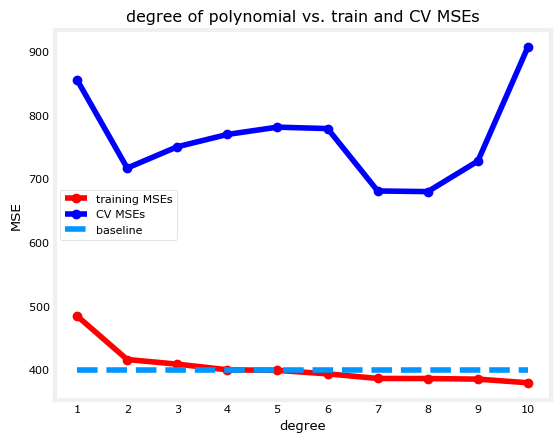

In [7]:
x_train,y_train, x_cv,y_cv,x_test,y_test=utils.prepare_dataset('./data/c2w3_lab2_data1.csv')
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

#Preview in first 5 rows
print(f"first 5 rows of the training inputs (1 feature):\n {x_train[:5]}\n")

# Instantiate the regression model class
model=LinearRegression()
utils.train_plot_poly(model,x_train,y_train,x_cv,y_cv,max_degree=10,baseline=400)

As you can see, the more polynomial features you add, the better the model fits to the training data. In this example, it even performed better than the baseline. At this point, you can say that the models with degree greater than 4 are low-bias because they perform close to or better than the baseline.

However, if the baseline is defined lower (e.g. you consulted an expert regarding the acceptable error), then the models are still considered high bias. You can then try other methods to improve this.

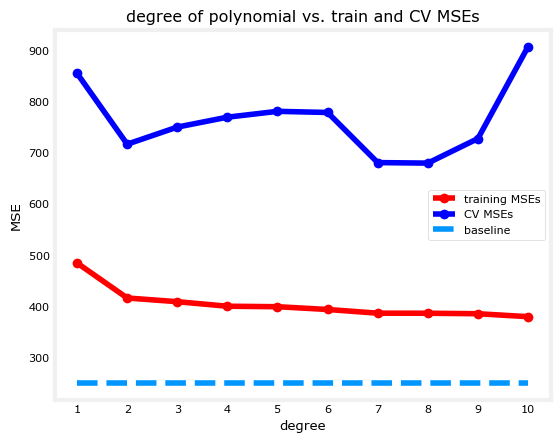

In [9]:
utils.train_plot_poly(model,x_train,y_train,x_cv,y_cv,max_degree=10,baseline=250)